In [1]:
from qiskit import *
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
from qiskit.tools.visualization import plot_bloch_vector, plot_state_city, plot_state_hinton
from qiskit.tools.visualization import plot_state_qsphere
from qiskit.quantum_info import Statevector
from qiskit.tools.visualization import plot_state_paulivec
import warnings
warnings.filterwarnings(action='ignore')

## Plotters for our results - matplotlib is required
- **In every visualizer, new figures are created if no ax is specified while making the figures**
- Histogram
- Bloch Multivector
- Bloch Vector
- Qshpere
- Density Matrix - 
    - Hinton Plot
    - State city plot
    - Pauli plot
- plot_error_map
- plot_gate_map 
- plot_circuit_layout

## Visualising
- Let us pick a 2 qubit state which is - 
    $$ |\psi_1 \rangle = \frac{|00 \rangle + |01 \rangle + |10 \rangle + |11 \rangle}{2} $$
    $$ \downarrow   $$
    $$$$
    $$ |\psi_2 \rangle = \frac{|00 \rangle - |01 \rangle - |10 \rangle + |11 \rangle}{2} $$


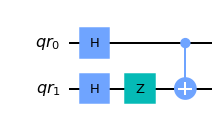

In [63]:
# building the circuit using registers
qr = QuantumRegister(size=2, name='qr')
qc = QuantumCircuit(qr) 
#  do hadamard transform
qc.h(qr)
qc.z(qr[1])
qc.cx(qr[0], qr[1])
qc.draw('mpl')

In [64]:
# finding out the state vector
from qiskit.providers.aer import * 
sv_sim = BasicAer.get_backend('statevector_simulator')
sv_sim = Aer.get_backend('statevector_simulator')
sv_sim = StatevectorSimulator(max_parallel_experiments = 0)
res = execute(qc, backend=Aer.get_backend('statevector_simulator'))
sv = res.result().get_statevector(decimals=4)
print("Statevector :", sv)
print("Correct statevector generated!\nLet's move ahead")

Statevector : [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5+0.j]
Correct statevector generated!
Let's move ahead


- NICE! can also have parallel execution in multiple threads of execution in the backend simulation

In [65]:
from qiskit.circuit.random import random_circuit 
qc = []
for _ in range(40):
    qc.append(random_circuit(num_qubits = 5, depth = 14))
qc[1]

In [66]:
res = execute(qc,backend = sv_sim, shots = 2**12)
res 

### 1. Plot the histogram of the data 
- Has numerous options 
1. Data : the count values which we provide in the circuit (can also be a list)
2. color : the color of the bars ( can also be a list) 
3. sort : how to display the results of the measurement outcomes - 'acs', 'desc', 'value', 'hamming', etc.
4. legend : which colors represent which label
5. bar_labels : the labels to be assigned to the bars 
6. title : what to show as the title of the figure
7. number_to_keep : number of terms to plot in the figure 

In [6]:
from qiskit.tools.visualization import plot_histogram

In [7]:
qc.measure_all()
# backend needs to be specified when you run the circuit
backend = BasicAer.get_backend('qasm_simulator')
res = []
for _ in range(2):
    res.append(execute(qc, backend=backend, shots=5121).result())


In [8]:
counts = []
for i in range(2):
    counts.append(res[i].get_counts())

In [9]:
print("Experiment counts :", counts)

Experiment counts : [{'11': 1249, '01': 1264, '10': 1292, '00': 1316}, {'10': 1267, '00': 1341, '01': 1231, '11': 1282}]


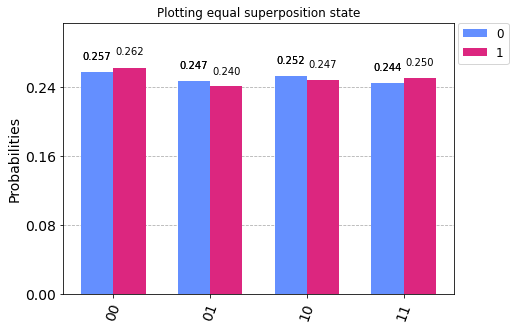

In [12]:
plot_histogram(counts,
               title='Plotting equal superposition state',
               legend= range(2),
               bar_labels=True, # whether to show probs or not 
               sort='asc'  # sort by the bin values, 
               )

## 2. Bloch Multivector for the state 
- $$ |\psi_2 \rangle = \frac{|00 \rangle - |01 \rangle - |10 \rangle + |11 \rangle}{2} $$
- $$ |\psi_2 \rangle = |- \rangle |- \rangle $$

In [14]:
qc = QuantumCircuit(2)
qc.h([0, 1])
qc.z(1)
qc.cx(0, 1)

In [15]:
state1 = Statevector.from_label('00')
state1 = state1.evolve(qc)

In [16]:
# since this state is a product state, the multivector method 
# can plot it 
state2 = execute(qc, backend=Aer.get_backend(
    'statevector_simulator')).result().get_statevector(decimals=4)

### Multivector plotter
- Doesn't have a lot of options 
1. state : the quantum state which we want to plot on the Bloch sphere 
2. reverse_bits : means that the spheres are plotted in the reverse manner 

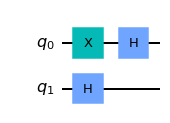

In [17]:
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.h(1)
qc.draw('mpl')

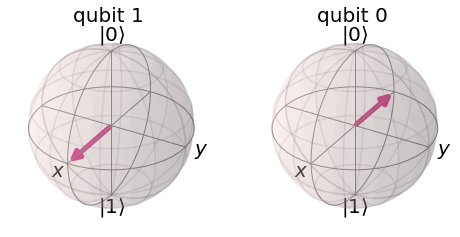

In [18]:
sv = execute(qc,backend = sv_sim).result().get_statevector()
plot_bloch_multivector(sv,reverse_bits=True)

- Note that the bits are reversed and the first sphere contains the qubit 1 instead of qubit 0 

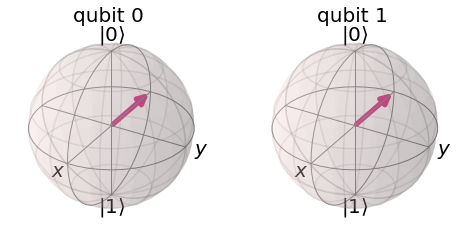

In [19]:
# plotting the bloch vectors for the original -- state 
plot_bloch_multivector(state1)


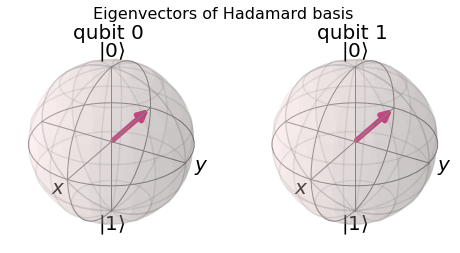

In [20]:
plot_bloch_multivector(state2, title='Eigenvectors of Hadamard basis')

In [21]:
# raises an error if the input is not an n qubit state

### Plotting bloch vector 
- Note that the bloch vector takes either cartesian or the polar coordinates of the quantum state
- Either $|\psi \rangle$ is the function of $(x,y,z)$ or it is a function of $(r,\theta, \phi)$ - $\theta$ is the inclination from the Z axis and $\phi$ is the rotation around it, in a circle
- It never raises an error and even plots outside and inside the sphere 
- Important parameter is **coord_type**. It specifies whether we have cartesian or spherical coordinates on which the state is being defined

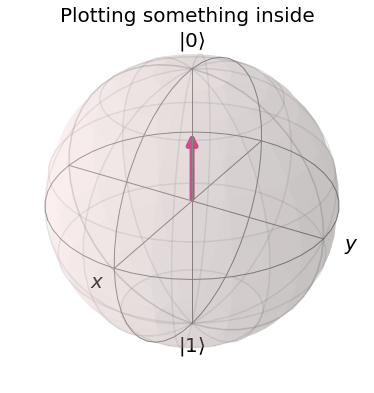

In [22]:
plot_bloch_vector(title='Plotting something inside',
                  bloch=[0, 0, 0.54])  # x,y,z coordinates

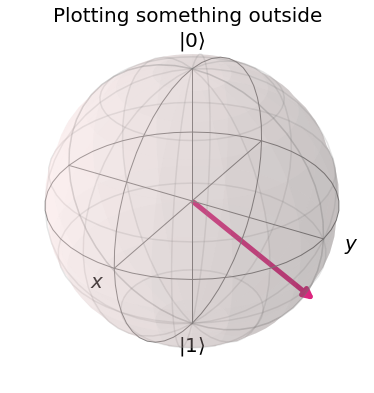

In [23]:
# does not raise error if the state goes out or inside the
# sphere
plot_bloch_vector(bloch=[0.7, 1.3, 0],
                  title='Plotting something outside')

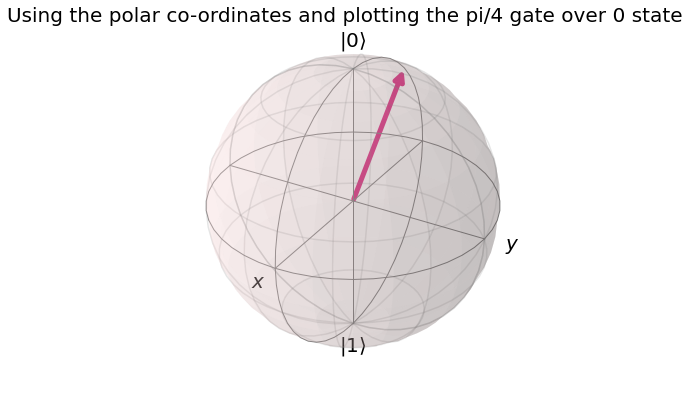

In [26]:
pi = np.pi
plot_bloch_vector(title='Using the polar co-ordinates and plotting the pi/4 gate over 0 state ',
                  bloch=[1, pi/4, pi],
                  coord_type='spherical')

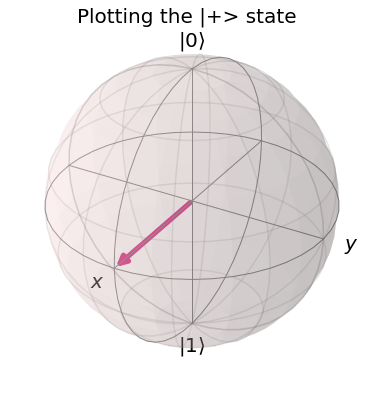

In [76]:
plot_bloch_vector(title='Plotting the |+> state',
                  bloch = [1,pi/2,0],
                 coord_type='spherical')

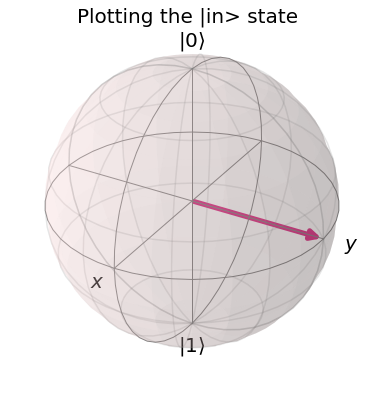

In [77]:
plot_bloch_vector(title='Plotting the |in> state',
                  bloch = [1,pi/2,pi/2],
                 coord_type='spherical')

## Plotting Q sphere
- What if we have an **entangled state**? plot multivector method breaks down as it can't plot entangled states

- We plot a Q-shpere
- Let us make a variant of the $GHZ$ state : |000> - |111> / sqrt(2) state

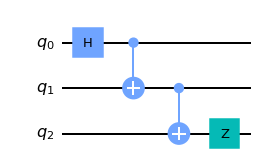

In [66]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(1,2)
qc.z(2)
qc.draw('mpl')

In [67]:
sv = Statevector.from_int(0,dims = 8)
sv = sv.evolve(qc)
sv = np.around(sv,4)

In [68]:
# correct 
sv  

array([ 0.7071+0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,  0.    +0.j,
        0.    +0.j,  0.    +0.j, -0.7071+0.j])

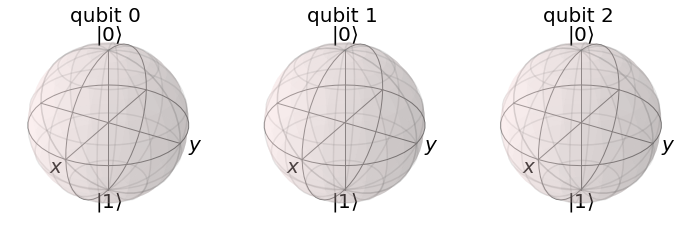

In [69]:
# trying to plot a bloch multi vector fails 
plot_bloch_multivector(sv)

- **Some important parameters** are :
    1. state : the state we want to plot - must be Statevector, DensityMatrix or ndarray
    2. show_state_labels : whether to show state labels or not
    3. show_state_phases : whether to show phase values or not
    4. use_degrees : to use radians or degrees while plotting
- Raises errors if invalid quantum states are given or matplotlib is not present in the system environment

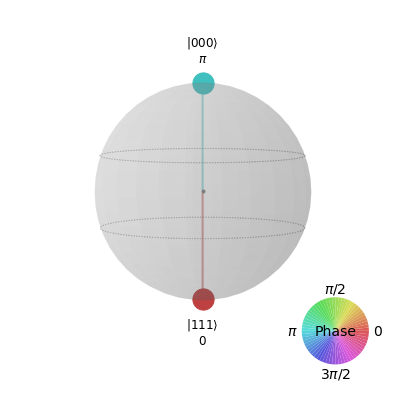

In [70]:
plot_state_qsphere(sv, show_state_labels= True, show_state_phases=True)

In [71]:
qc.h(1)

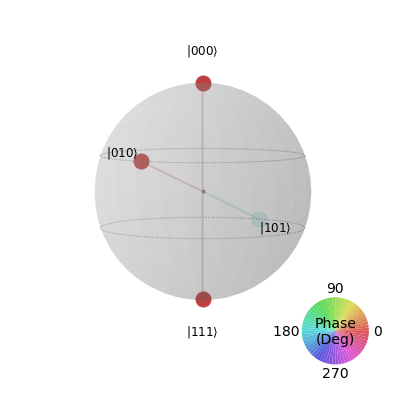

In [72]:
sv = Statevector.from_label('000')
sv = sv.evolve(qc) 
plot_state_qsphere(sv,use_degrees=True) # to plot the relative phases 
                                        # in degrees...

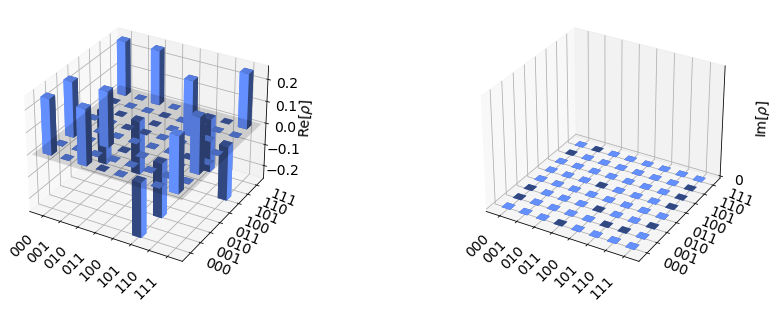

In [73]:
plot_state_city(sv)

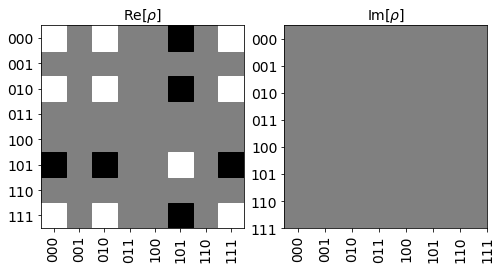

In [74]:
plot_state_hinton(sv)

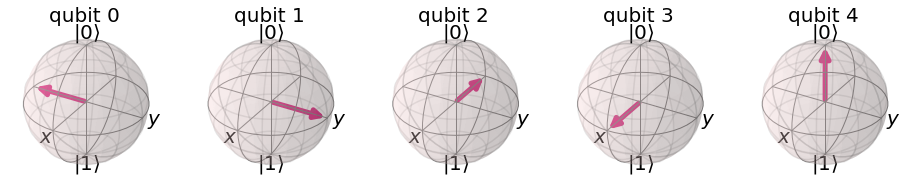

In [75]:
plot_bloch_multivector(Statevector.from_label('0+-rl'))

# NOTE : the state is to be read from right to left which means that iif 
# it is '+0-l', then qubit 0 is in state |l>, qubit 1 is in state |->
# qubit 2 in state |0> and qubit 3 in state |+>

# nice
# the from label method can also generate other basis
# vectors that are up:0, down:1, plus:+, minus:-, right:r and left:l.

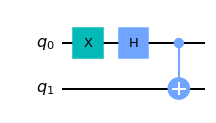

In [76]:
# making another entangled state for our sphere
qc = QuantumCircuit(2)
qc.x(0)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [77]:
sv = Statevector.from_int(0,dims = 4)
sv = sv.evolve(qc)
sv = np.around(sv)
print(sv)

[ 1.+0.j  0.+0.j  0.+0.j -1.+0.j]


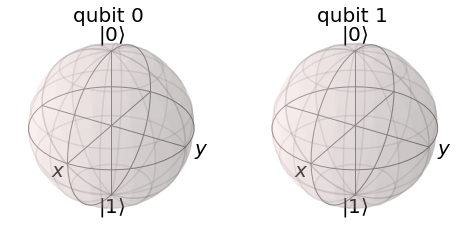

In [78]:
plot_bloch_multivector(sv) # won't plot anything

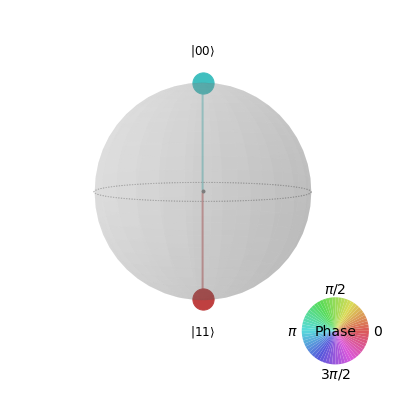

In [79]:
plot_state_qsphere(sv)

## Plotting density matrices
- The density matrix of our system is just - 
    $$ \rho = |\psi \rangle \langle \psi| $$
- There are 3 ways to plot it - 
    - State city method which plots the real and complex values pertaining to each basis states of the density matrix
    - Hinton plot method 
    - Pauli vector method which plots the **expectation values of the statevector with different combinations of the Pauli matrices**

### plot_state_city method
- Very useful to visualize the statevector's real and imaginary components of the present basis states
- Real components plotted in one figure
- Complex in another
    - The main parameter is **state** which is actually plotted in our graph

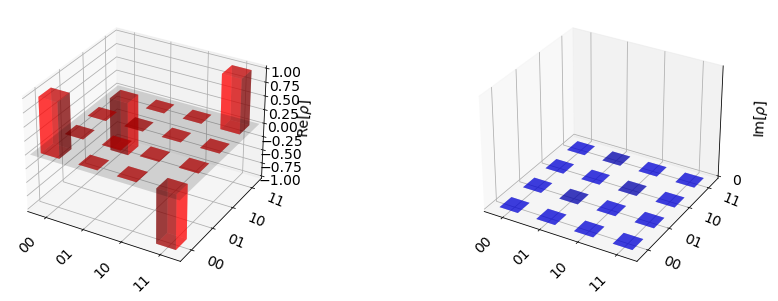

In [80]:
plot_state_city(sv, color= 'rb',alpha = 0.5) # plotting for the bell state 

### plot_state_hinton method
- Used to plot the density matrix in 2 dims instead of 3, as it was done in the state city method
- Only notable arguments are **state** and **title**

Lighter color corresponds to a more positive value
 Negative values are represented by a darker color


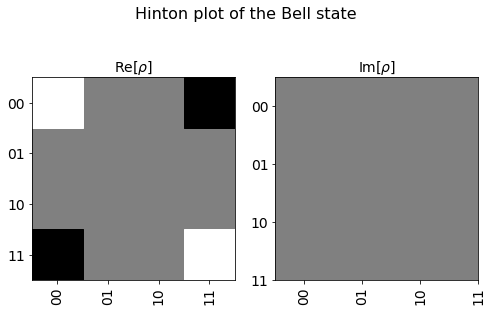

In [81]:
print('Lighter color corresponds to a more positive value\n Negative values are represented by a darker color')
plot_state_hinton(sv,title='Hinton plot of the Bell state ')

### plot_state_paulivec method
- This method is used to plot the expectation value of the quantum state over different combinations of pauli gates 
- Means, if state is 2-qubit in size, the combos are - 
    - II, IX, IY, IZ, XX, XY, XZ, YX, YY, YZ, ZZ, ZX, ZY
- NOTE : if the operator is $A$, the expectation value of the state $| \psi \rangle$ is calculated by $ \langle \psi | A | \psi \rangle$

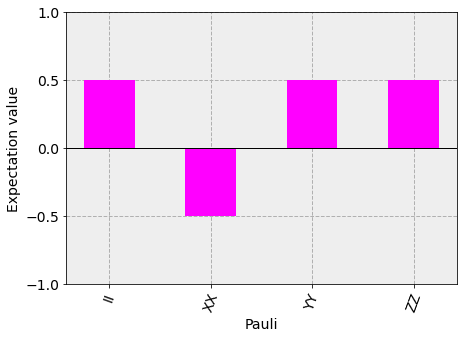

In [86]:
plot_state_paulivec(sv, color = 'magenta')

### Plotting gate maps for a Device

In [36]:
from qiskit.providers.ibmq import IBMQ 
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q-education')

ibmqfactory.load_account:WARNING:2021-07-27 13:20:35,331: Credentials are already in use. The existing account in the session will be replaced.


In [37]:
casb = provider.get_backend('ibmq_casablanca')
belem = provider.get_backend('ibmq_belem')
lagos = provider.get_backend('ibm_lagos')

In [89]:
from qiskit.tools.visualization import plot_error_map, plot_gate_map

### plot_error_map
- Does not have many features only the **backend** for which we want to plot it

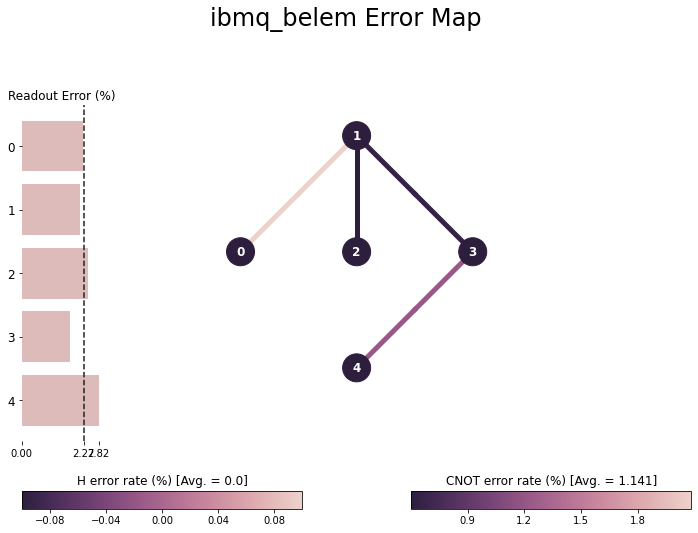

In [90]:
plot_error_map(belem,show_title=True)

### plot_gate_map
- This has many paramters but most are related to just changing the display information like qubit color, line color, qubit size, line width, etc. 


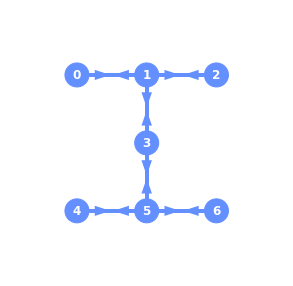

In [108]:
plot_gate_map(casb, plot_directed = True)

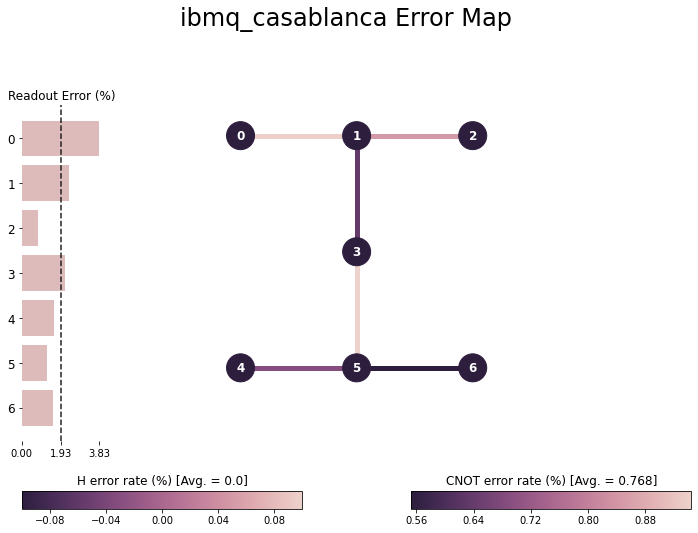

In [93]:
plot_error_map(casb)

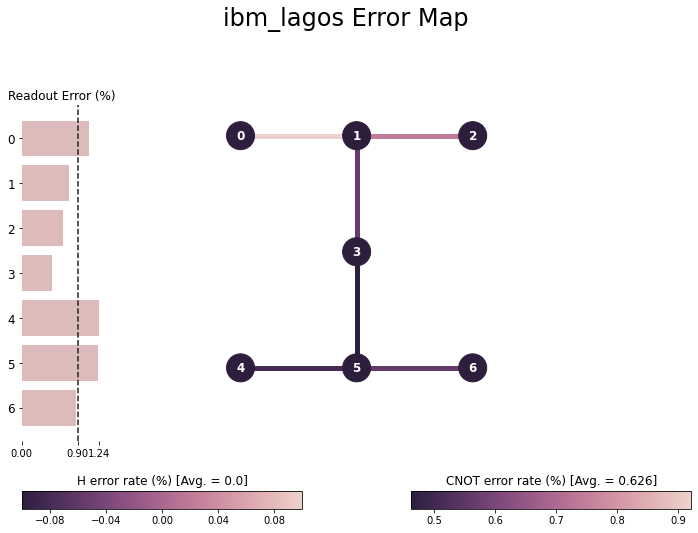

In [94]:
plot_error_map(lagos) 

### plot_circuit_layout
- Plotting the mapping of our circuit in the device we want to execute our circuit on 

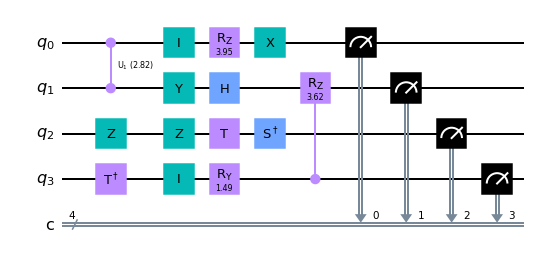

In [103]:
from qiskit.circuit.random import random_circuit
random_circ = random_circuit(num_qubits= 4, depth = 4, measure = True)
random_circ.draw('mpl')

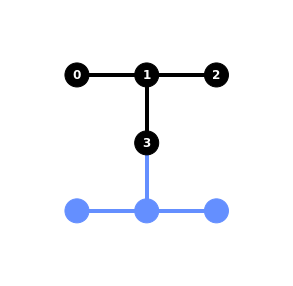

In [104]:
from qiskit.tools.visualization import plot_circuit_layout 
trans = transpile(random_circ, casb)
plot_circuit_layout(trans,casb)

In [ ]:
from qiskit.tools.jupyter import * 
%qiskit_backend_overview